The setup consists of 4 hotel rooms and 7 wifi access points. All the 7 wifi APs are accessible from each room, but with different signal strengths. The signal strengths are in dBm. The task is to train a model which can accurately predict the room number, given the strengths of wifi signals from all the seven APs.

In [1]:

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
data_train=pd.read_csv('train.csv')
data_train.head()

,id,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
0,ID_1,-64,-56,-61,-66,-71,-82,-81,1
1,ID_2,-68,-57,-61,-65,-71,-85,-85,1
2,ID_3,-63,-60,-60,-67,-76,-85,-84,1
3,ID_4,-61,-60,-68,-62,-77,-90,-80,1
4,ID_5,-63,-65,-60,-63,-77,-81,-87,1


We notice that there are no categorical features at all - besides the class column. As some machine learning models can't handle categorical feature columns at all, we will encode this column to be a numerical column later on.


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
id       1500 non-null object
wifi1    1500 non-null int64
wifi2    1500 non-null int64
wifi3    1500 non-null int64
wifi4    1500 non-null int64
wifi5    1500 non-null int64
wifi6    1500 non-null int64
wifi7    1500 non-null int64
room     1500 non-null int64
dtypes: int64(8), object(1)
memory usage: 105.5+ KB


The dataset has 1500 examples, 8 feature columns and 1 target column. 


In [4]:
data_test=pd.read_csv('test.csv')
data_test.head()

,id,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7
0,ID_1,-62,-51,-54,-60,-74,-74,-82
1,ID_2,-57,-54,-51,-60,-47,-84,-88
2,ID_3,-56,-55,-44,-60,-51,-84,-86
3,ID_4,-19,-60,-54,-35,-69,-69,-78
4,ID_5,-67,-56,-60,-66,-73,-93,-87


In [5]:
data_train.describe()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
count,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-52.319333,-55.95800,-55.319333,-53.800667,-62.905333,-81.188000,-81.973333,2.500000
std,11.672883,3.37834,5.132666,11.732435,9.127024,6.679002,6.676002,1.118407
min,-74.000000,-74.00000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.00000,-58.250000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.00000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-54.00000,-52.000000,-47.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-46.00000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000




From the above table we can tell that are no missing values at all. This means: no imputing!

We also notice that most of the features stay within a reasonable scale when comparing values within only one column. We can recognize this from the min, max and quartil rows.


In [6]:
column_target=['room']
column_train=['wifi1','wifi2','wifi3','wifi4','wifi5','wifi6','wifi7']
X=data_train[column_train]
Y=data_train[column_target]

In [7]:
data_train['room'].value_counts()

4    375
3    375
2    375
1    375
Name: room, dtype: int64

wifi1        AxesSubplot(0.125,0.71587;0.168478x0.16413)
wifi2     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
wifi3     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
wifi4     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
wifi5       AxesSubplot(0.125,0.518913;0.168478x0.16413)
wifi6    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
wifi7    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
room     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

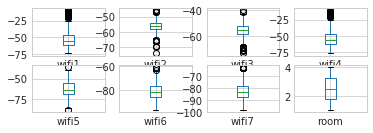

In [8]:
data_train.plot(kind='box', subplots=True, layout=(4,4))

In [9]:
print( data_train.corr(method='pearson'))

          wifi1     wifi2     wifi3     wifi4     wifi5     wifi6     wifi7  \
wifi1  1.000000 -0.025001  0.008173  0.923140 -0.264992  0.719425  0.681010   
wifi2 -0.025001  1.000000  0.266312 -0.015241  0.171894  0.064655  0.037988   
wifi3  0.008173  0.266312  1.000000  0.047409  0.598848 -0.106953 -0.090573   
wifi4  0.923140 -0.015241  0.047409  1.000000 -0.251789  0.701984  0.667914   
wifi5 -0.264992  0.171894  0.598848 -0.251789  1.000000 -0.424032 -0.366804   
wifi6  0.719425  0.064655 -0.106953  0.701984 -0.424032  1.000000  0.726351   
wifi7  0.681010  0.037988 -0.090573  0.667914 -0.366804  0.726351  1.000000   
room  -0.084136  0.116089  0.663055 -0.051578  0.813521 -0.368125 -0.315843   

           room  
wifi1 -0.084136  
wifi2  0.116089  
wifi3  0.663055  
wifi4 -0.051578  
wifi5  0.813521  
wifi6 -0.368125  
wifi7 -0.315843  
room   1.000000  


Text(0.5,1,'room 4')

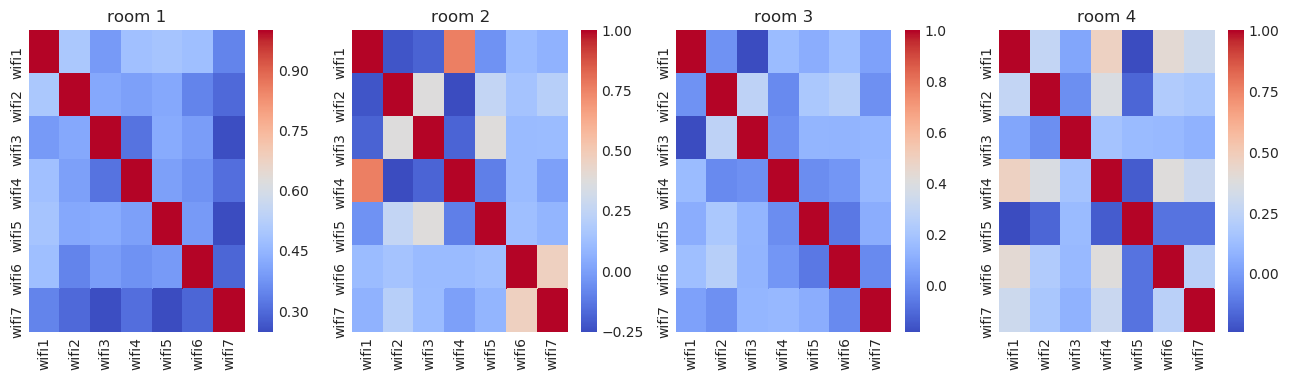

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(data_train[data_train['room']==1][['wifi1','wifi2','wifi3','wifi4','wifi5','wifi6','wifi7']].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('room 1')
ax = sns.heatmap(data_train[data_train['room']==2][['wifi1','wifi2','wifi3','wifi4','wifi5','wifi6','wifi7']].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('room 2')
ax = sns.heatmap(data_train[data_train['room']==3][['wifi1','wifi2','wifi3','wifi4','wifi5','wifi6','wifi7']].corr(), ax = axes[2], cmap='coolwarm')
ax.set_title('room 3')
ax = sns.heatmap(data_train[data_train['room']==4][['wifi1','wifi2','wifi3','wifi4','wifi5','wifi6','wifi7']].corr(), ax = axes[3], cmap='coolwarm')
ax.set_title('room 4')

For rooom 1,none of feature is highly correlated.For room 2,wifi 1 and wifi 4 are correlated more than 50percent.